## Assignment 3 (100 marks)
#### =====================================================================================================
### Deadline: 04/13 11:59 pm
#### =====================================================================================================

### Problem 1: PCA (20 marks)

`lab03_dataset_1.csv` contains 205 observations on various vehicles. This is an unsupervised training data. You will use the entire dataset for `PCA`.

### 1.a (2 marks)

For the 14 input features, drop any rows with missing numerical values and output the new length of the training dataset.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('lab03_dataset_1.csv')
data.replace('?', np.nan, inplace=True)
numeric_cols = data.columns
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric)
data = data.dropna(axis=0)
length = len(data)
print(f"The length of the training dataset is {length}.")

The length of the training dataset is 195.


### 1.b (6 marks)

Using the sklearn's `PCA` method, compute all the principal components (PCs) of the normalized dataset. All the PCs capture a fraction of the total variance, output all the variances captured by all the PCs. Write a code snippet that checks all the PCs and selects the `top k PCs` whose total variance captured is atleast `90%`. What did `k` come out to be?

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data) 

pca = PCA()
pca.fit(normalized_data)

variances = pca.explained_variance_ratio_
print("Variances:")
print(variances)


cumulative_variance = np.cumsum(variances)
k = np.argmax(cumulative_variance >= 0.90) + 1 


print(f"Number of PCs (k) to capture at least 90% variance: {k}")

Variances:
[0.53798682 0.16280221 0.08686665 0.06497251 0.04349587 0.02969316
 0.02289992 0.01929611 0.00859352 0.00790007 0.00582772 0.00458718
 0.00367119 0.00140706]
Number of PCs (k) to capture at least 90% variance: 6


### 1.c (3 marks)

Using the `top k PCs`, apply `dimensionality reduction` on the normalized dataset to generate and display the transformed dataset which should now have only `k columns`. Display the output as a DataFrame.

In [4]:
import pandas as pd
from sklearn.decomposition import PCA

pca_k = PCA(n_components=k)
transformed_data = pca_k.fit_transform(normalized_data)

transformed_df = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(k)])
print("Transformed dataset with k columns:")
print(transformed_df)


Transformed dataset with k columns:
          PC1       PC2       PC3       PC4       PC5       PC6
0   -0.612999 -2.164573 -0.298752 -2.436486  0.194563 -0.116741
1   -0.493886 -2.190732 -0.248341 -2.476630  0.331332 -0.157826
2    0.443900 -1.365449  1.449443  0.626999  0.359939 -2.002387
3   -0.178982 -0.256392  0.066248  1.153280  0.277470  0.118314
4    1.269804 -1.167075  0.018756  1.204362  0.048029 -0.332126
..        ...       ...       ...       ...       ...       ...
190  2.600083  0.420264 -1.077006  0.461281  0.101035  1.002321
191  3.448779 -0.236803 -1.025905  0.333152  0.002958  0.842925
192  3.449740 -0.496868 -1.466348  0.347475  0.868250  0.062013
193  2.329514  2.962563  1.129910  0.613319  2.005477 -0.648051
194  3.237368  0.114364 -1.090690  0.473486  0.217148  0.864490

[195 rows x 6 columns]


### 1.d (3 marks)

We learned in class that we can also obtain the PCs using `Eigen Decomposition`. But before we can do that, we need to generate the covariance matrix of the normalized dataset. Remember, the covariance matrix can be computed by simply performing the dot product of the normalized matrix with itself, divided by its size.

In [6]:
import numpy as np

n_samples = normalized_data.shape[0]
covariance_matrix = np.dot(normalized_data.T, normalized_data) / n_samples

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[ 1.          0.87922185  0.81900859  0.59250037  0.78272022  0.56970408
   0.49822752  0.17172176  0.24772981  0.37554127 -0.35233072 -0.4991263
  -0.5663546   0.58579283]
 [ 0.87922185  1.          0.85808381  0.49621812  0.88166497  0.68747862
   0.60943676  0.11866435  0.16017217  0.58381279 -0.28098572 -0.68965978
  -0.71932378  0.69533083]
 [ 0.81900859  0.85808381  1.          0.31583448  0.86731456  0.74031969
   0.5443105   0.18643226  0.19099734  0.6167786  -0.25162703 -0.64709916
  -0.69221989  0.75427339]
 [ 0.59250037  0.49621812  0.31583448  1.          0.30773178  0.03128552
   0.18928286 -0.05552478  0.26115993 -0.08441172 -0.26407787 -0.10236659
  -0.15118826  0.13829069]
 [ 0.78272022  0.88166497  0.86731456  0.30773178  1.          0.85757324
   0.64580603  0.17278521  0.15538181  0.76028522 -0.27894406 -0.77217086
  -0.81270968  0.83572934]
 [ 0.56970408  0.68747862  0.74031969  0.03128552  0.85757324  1.
   0.58309133  0.21198929  0.02461689  0.

### 1.e (3 marks)

Use `Eigen Decomposition` on the covariance matrix to compute and output the eigenvalues and eigenvectors.

In [7]:
import numpy as np

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[7.53181553 2.27923094 1.21613308 0.90961519 0.60894217 0.4157043
 0.32059895 0.27014548 0.01969881 0.12030933 0.11060092 0.08158813
 0.06422049 0.05139667]

Eigenvectors:
[[-0.28820539  0.29182288 -0.12994231  0.24040455  0.04039015 -0.09104465
  -0.29280991 -0.29480758 -0.09232403  0.31803097 -0.40383755  0.35247887
  -0.40884789 -0.10187205]
 [-0.32846158  0.16336179 -0.12744458  0.14708138  0.00746205 -0.00328196
  -0.22826758 -0.01685486  0.16438874  0.44759966  0.27680872 -0.64714753
   0.17005108 -0.15292076]
 [-0.32387774  0.12579458  0.0515971   0.09327862 -0.12886681 -0.12363832
  -0.45853571 -0.19737255 -0.02259169 -0.66047755  0.36152498  0.09955421
   0.07695175 -0.05947995]
 [-0.1109331   0.39950597 -0.47616754  0.39155982  0.00161832  0.08195927
   0.60515036  0.02555923 -0.01202006 -0.1785461   0.16431334  0.09618862
   0.06889848 -0.03785127]
 [-0.35188704  0.06169051  0.05439206 -0.01531897 -0.05746168 -0.04554559
  -0.01314028  0.1358526  -0.1092253   0.

### 1.f (3 marks)

Generate the projections of the normalized dataset using the `first k PCs` (use the `k` obtained in `1.b`) and display it as a DataFrame.

In [8]:
import numpy as np
import pandas as pd

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
top_k_eigenvectors = sorted_eigenvectors[:, :k]
projected_data_eigen = np.dot(normalized_data, top_k_eigenvectors)
projected_df_eigen = pd.DataFrame(projected_data_eigen, columns=[f'PC{i+1}' for i in range(k)])

print("Projected dataset using top k eigenvectors from Eigen Decomposition:")
print(projected_df_eigen)

Projected dataset using top k eigenvectors from Eigen Decomposition:
          PC1       PC2       PC3       PC4       PC5       PC6
0    0.612999 -2.164573 -0.298752 -2.436486 -0.194563 -0.116741
1    0.493886 -2.190732 -0.248341 -2.476630 -0.331332 -0.157826
2   -0.443900 -1.365449  1.449443  0.626999 -0.359939 -2.002387
3    0.178982 -0.256392  0.066248  1.153280 -0.277470  0.118314
4   -1.269804 -1.167075  0.018756  1.204362 -0.048029 -0.332126
..        ...       ...       ...       ...       ...       ...
190 -2.600083  0.420264 -1.077006  0.461281 -0.101035  1.002321
191 -3.448779 -0.236803 -1.025905  0.333152 -0.002958  0.842925
192 -3.449740 -0.496868 -1.466348  0.347475 -0.868250  0.062013
193 -2.329514  2.962563  1.129910  0.613319 -2.005477 -0.648051
194 -3.237368  0.114364 -1.090690  0.473486 -0.217148  0.864490

[195 rows x 6 columns]


### Problem 2: Clustering (30 marks)

`lab03_dataset_2.csv` contains 239 observations with two input features *x1* and *x2*.

`lab03_dataset_3.csv` contains 1440 observations with two input features *x1* and *x2*.

For this task, you will perform various clustering-related operations using the `sklearn clustering` module.

### 2.a (6 marks)

Using `lab03_dataset_2.csv`, apply sklearn's `SpectralClustering` algorithm on the two-dimensional data and output the resulting clusters using a scatterplot. You will apply `SpectralClustering` over several clusters ranging from cluster-count `K = 2 to 6`. Make sure for every iteration of different cluster-count, your scatterplot should use `K colors` to clearly distinguish the data points belonging in their respective `K clusters`. Also, compute the `Silhouette score` for each of those `K clusters` and plot that score against `K`. Label the plot axes accordingly.

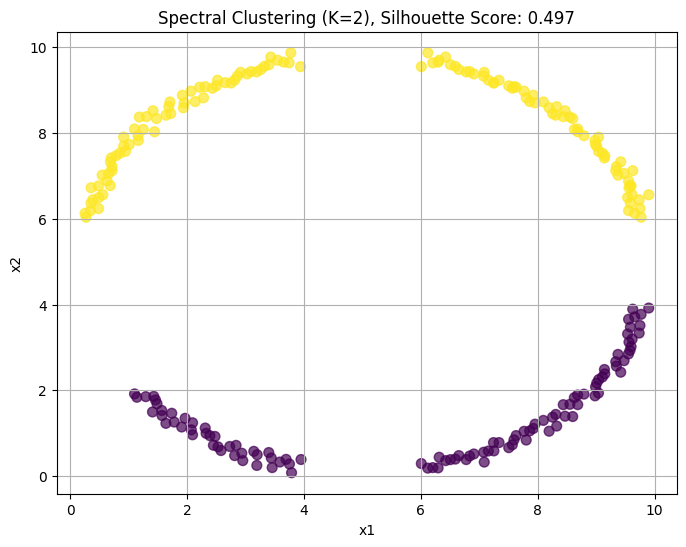

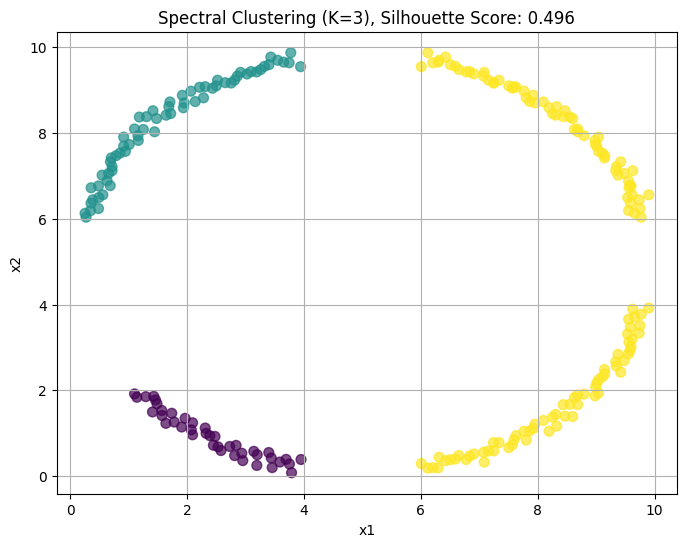

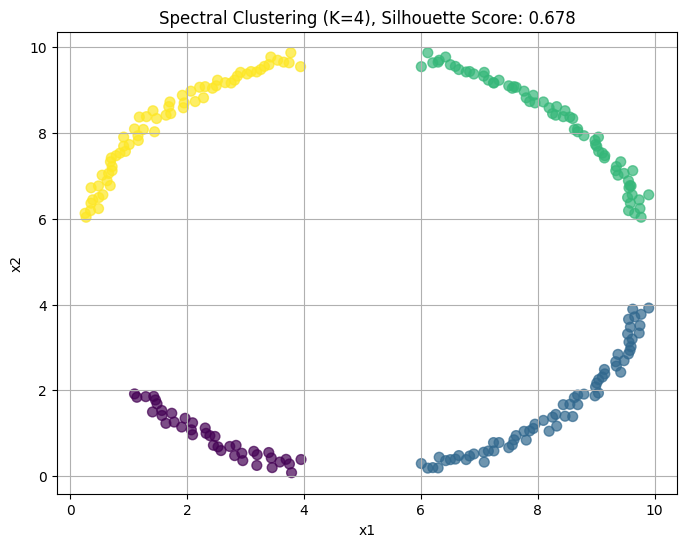

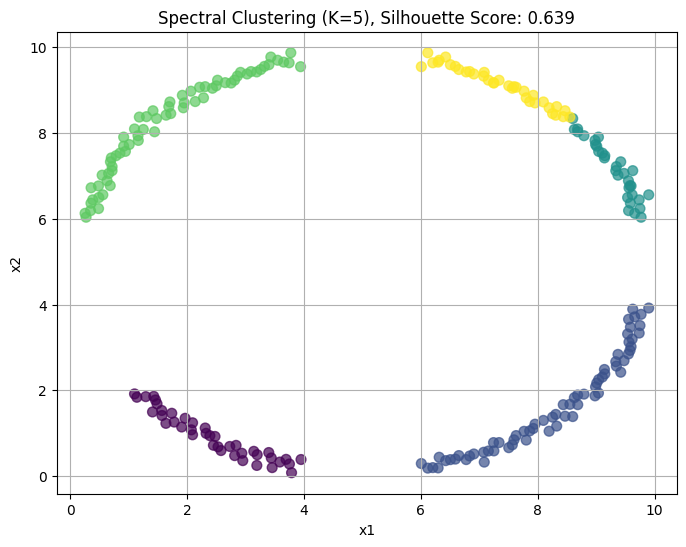

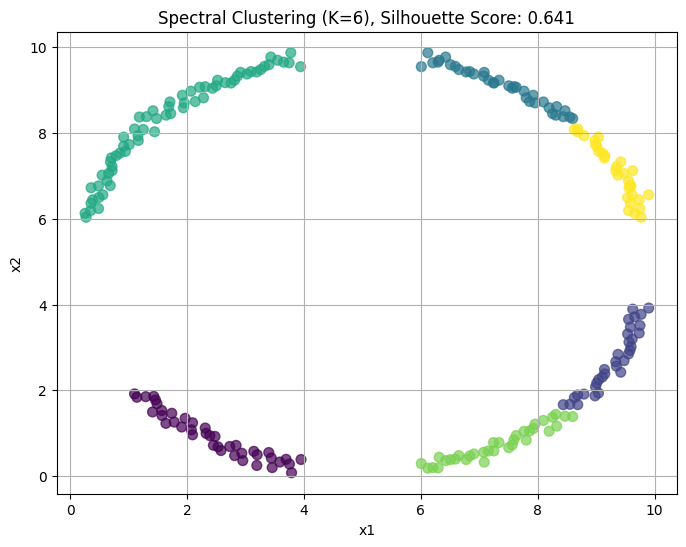

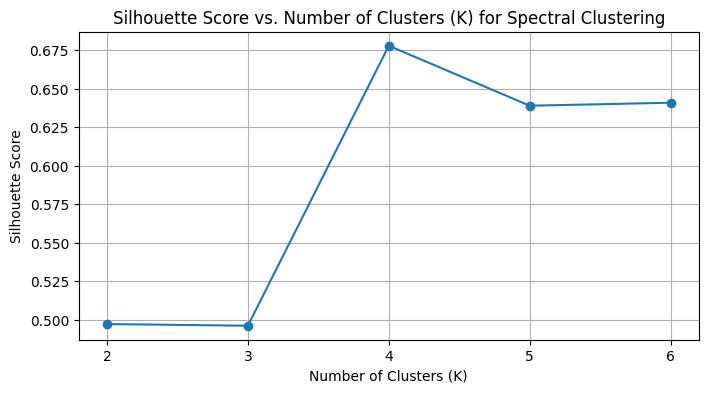

Silhouette Scores (Spectral): [np.float64(0.49721305003469096), np.float64(0.4961330651976005), np.float64(0.6778975743295701), np.float64(0.6389432396917658), np.float64(0.6408922634626288)]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

data2 = pd.read_csv('lab03_dataset_2.csv')
X2 = data2[['x1', 'x2']].values

k_range = range(2, 7)
silhouette_scores_spectral = []

for k_val in k_range:
    spectral = SpectralClustering(n_clusters=k_val,
                                  assign_labels='discretize',
                                  random_state=42,
                                  affinity='rbf')
    labels = spectral.fit_predict(X2)

    score = silhouette_score(X2, labels)
    silhouette_scores_spectral.append(score)

    plt.figure(figsize=(8, 6))
    plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(f'Spectral Clustering (K={k_val}), Silhouette Score: {score:.3f}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores_spectral, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K) for Spectral Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Silhouette Scores (Spectral):", silhouette_scores_spectral)

### 2.b (6 marks)

Repeat `2.a` but instead use sklearn's `AgglomerativeClustering` model for learning.

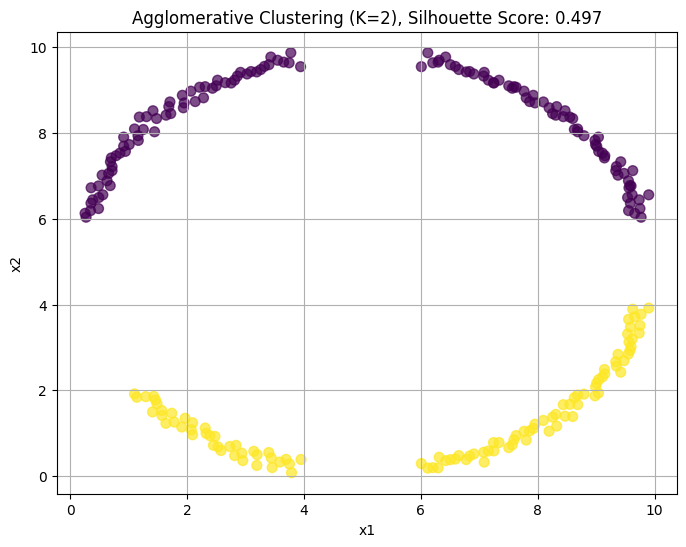

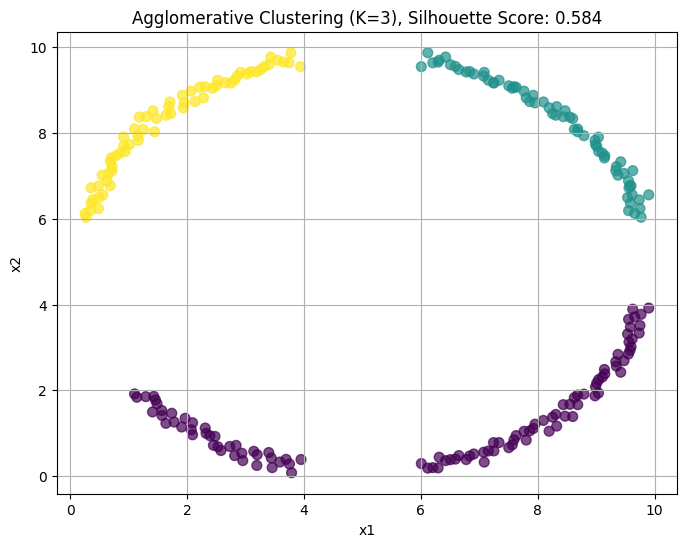

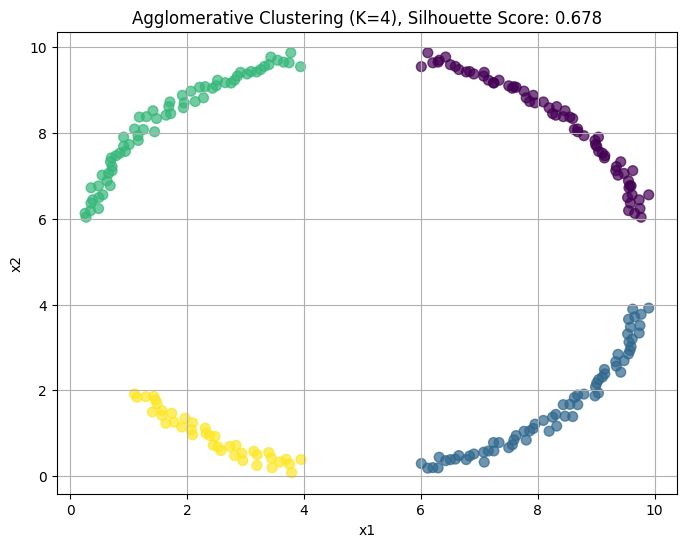

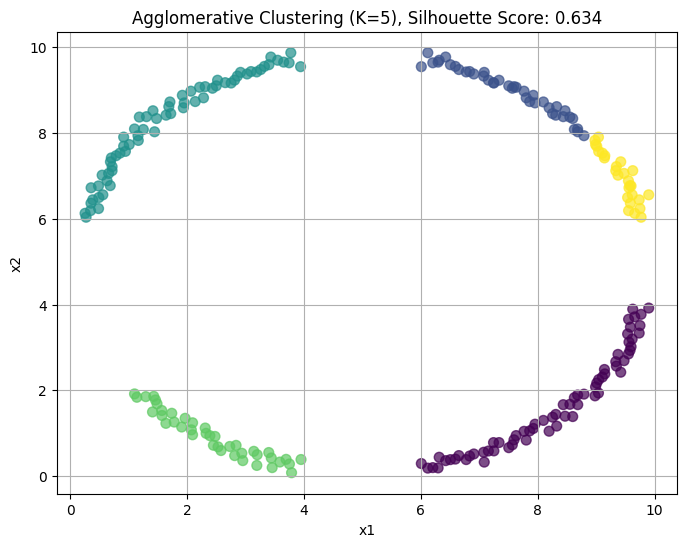

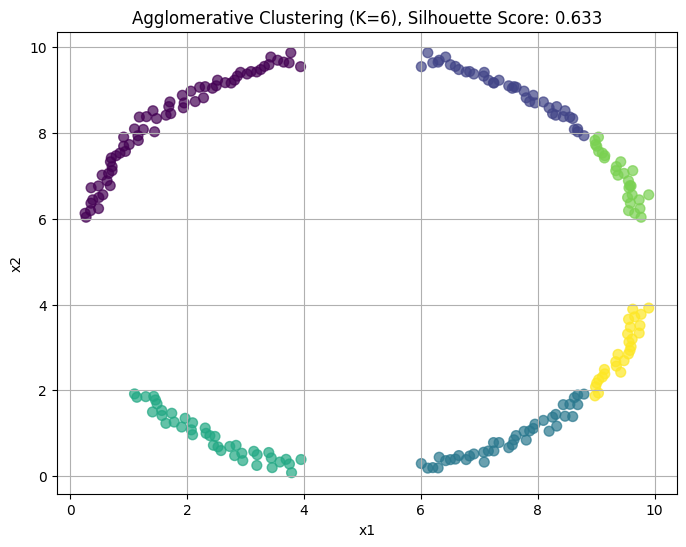

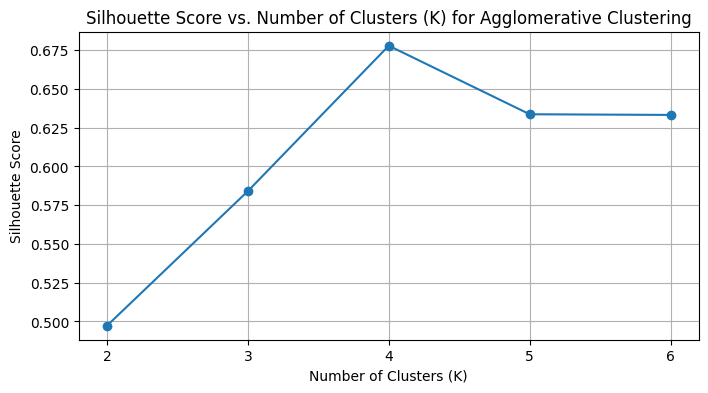

Silhouette Scores (Agglomerative): [np.float64(0.49721305003469096), np.float64(0.5840666810191435), np.float64(0.6778975743295701), np.float64(0.633670610821244), np.float64(0.6332415850612207)]


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

data2 = pd.read_csv('lab03_dataset_2.csv')
X2 = data2[['x1', 'x2']].values

k_range = range(2, 7)
silhouette_scores_agglo = []

for k_val in k_range:
    agglo = AgglomerativeClustering(n_clusters=k_val)
    labels = agglo.fit_predict(X2)

    score = silhouette_score(X2, labels)
    silhouette_scores_agglo.append(score)

    plt.figure(figsize=(8, 6))
    plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(f'Agglomerative Clustering (K={k_val}), Silhouette Score: {score:.3f}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores_agglo, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K) for Agglomerative Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Silhouette Scores (Agglomerative):", silhouette_scores_agglo)

### 2.c (6 marks)

Using `lab03_dataset_3.csv`, apply sklearn's `GaussianMixture` on the two-dimensional data and output the resulting clusters using a scatterplot. You will apply `GaussianMixture` over several clusters ranging from cluster-count `K = 2 to 6`. Make sure your scatterplot uses `K colors` to clearly distinguish the data points belonging in their respective `K clusters`. Also, compute the `Silhouette score` for each of those `K clusters` and plot the `Silhouette score` against `K clusters`. Label the plot axes accordingly.

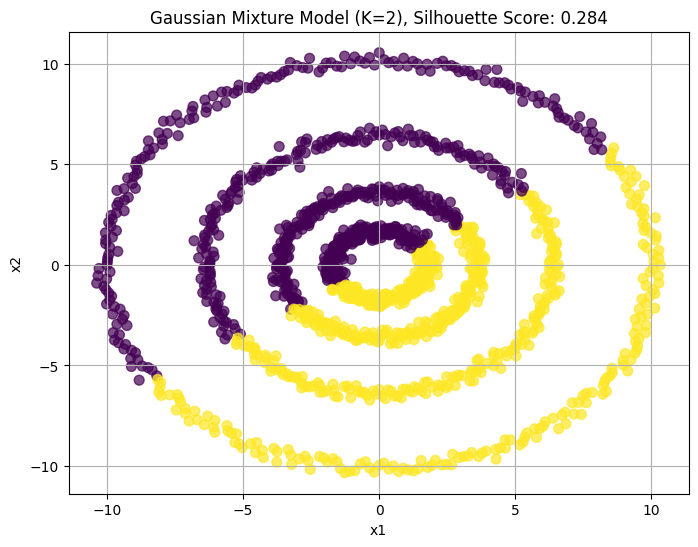

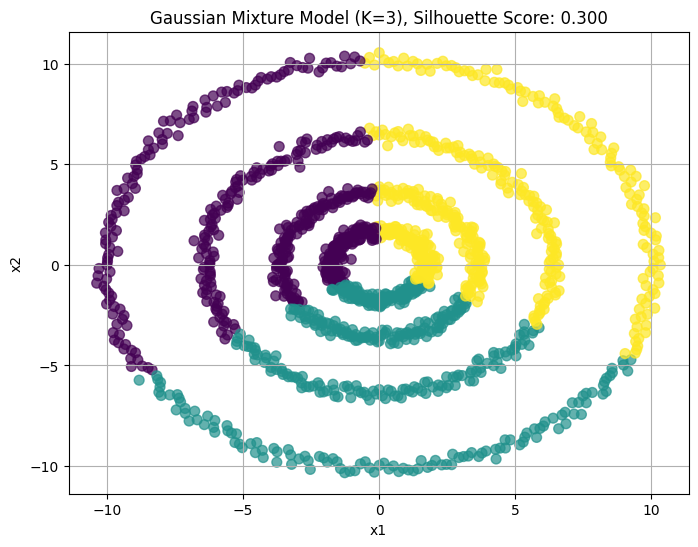

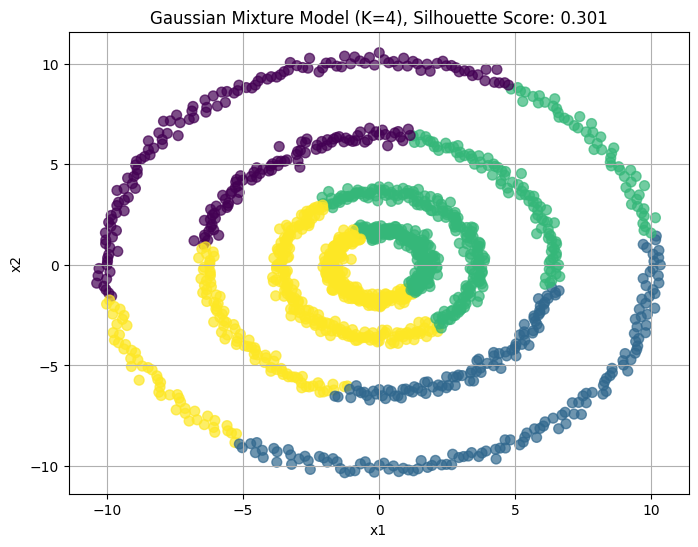

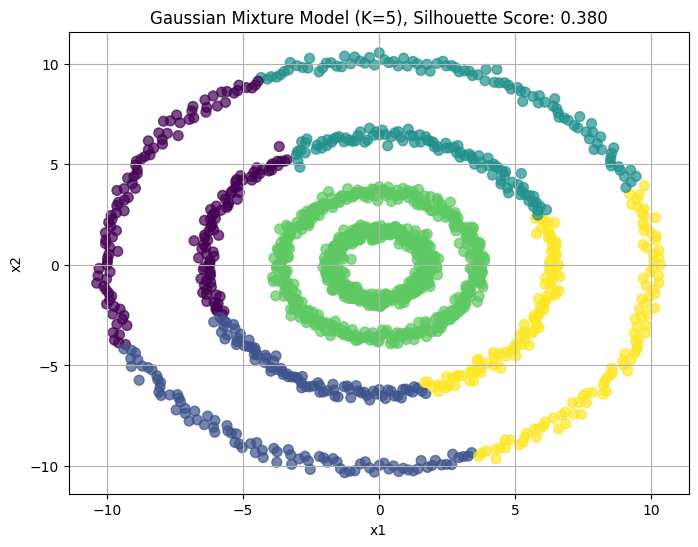

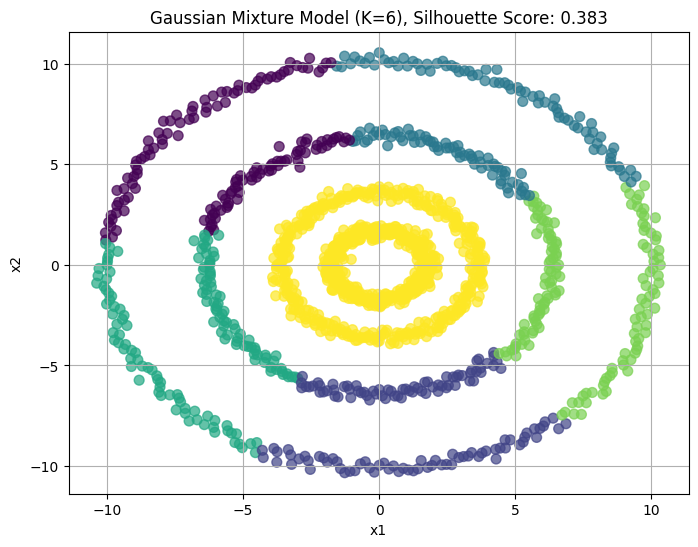

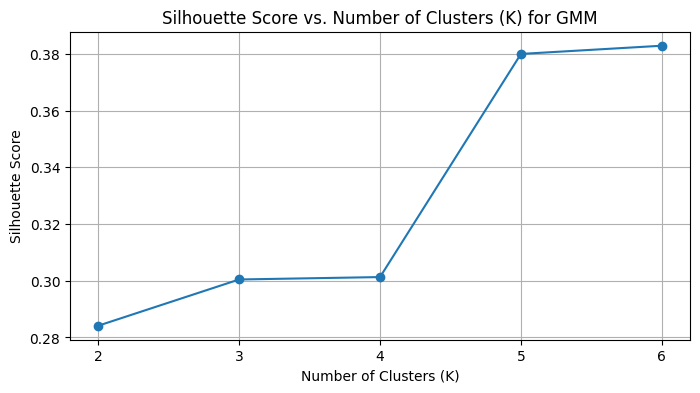

Silhouette Scores (GMM): [np.float64(0.28414151841936747), np.float64(0.3004434018121168), np.float64(0.3012929061663151), np.float64(0.379965295949864), np.float64(0.3828571545796741)]


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

data3 = pd.read_csv('lab03_dataset_3.csv')
X3 = data3[['x1', 'x2']].values

k_range = range(2, 7)
silhouette_scores_gmm = []

for k_val in k_range:
    gmm = GaussianMixture(n_components=k_val, random_state=42)
    labels = gmm.fit_predict(X3)

    score = silhouette_score(X3, labels)
    silhouette_scores_gmm.append(score)

    plt.figure(figsize=(8, 6))
    plt.scatter(X3[:, 0], X3[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(f'Gaussian Mixture Model (K={k_val}), Silhouette Score: {score:.3f}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores_gmm, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K) for GMM')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Silhouette Scores (GMM):", silhouette_scores_gmm)

### 2.d (6 marks)

Repeat `2.c` but instead use sklearn's `KMeans` model for learning.

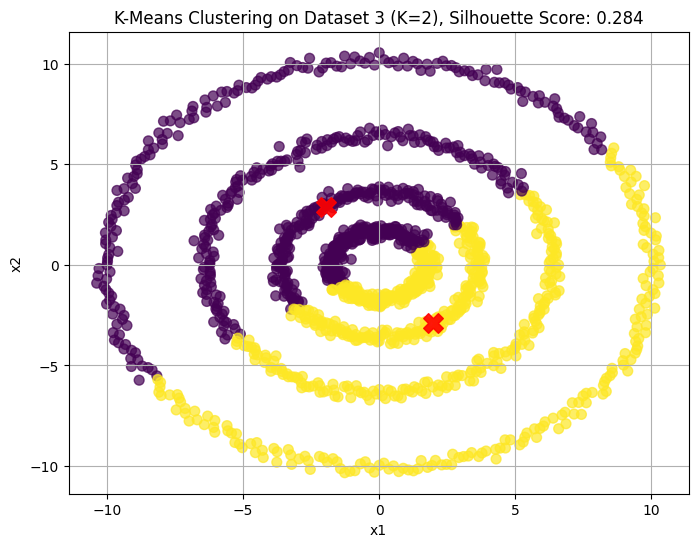

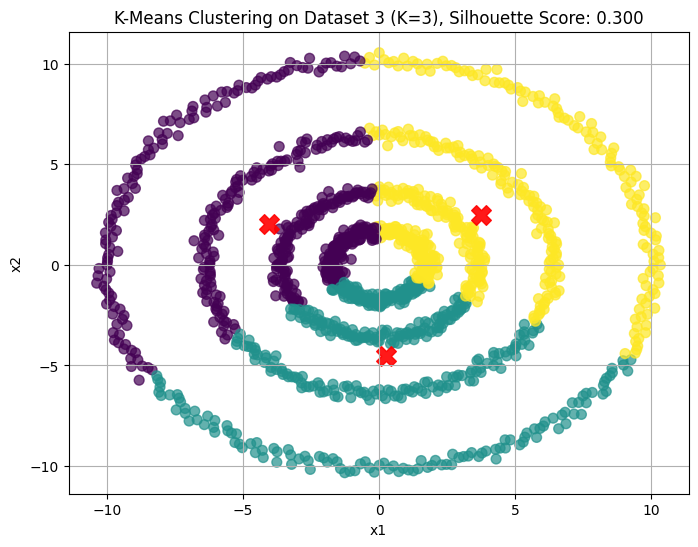

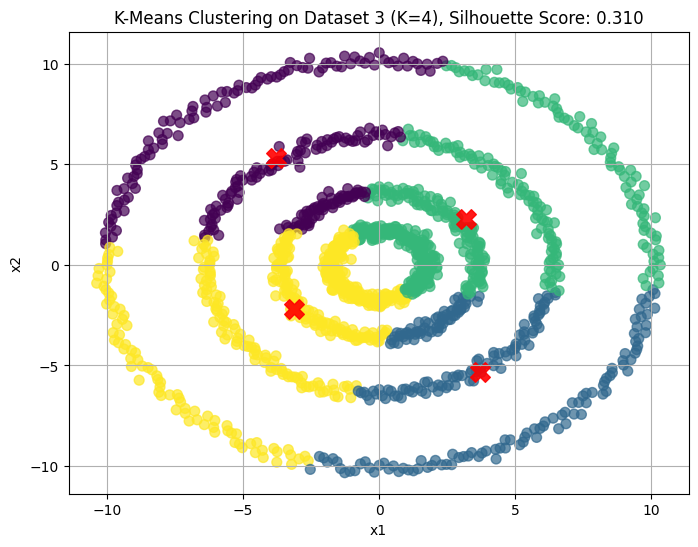

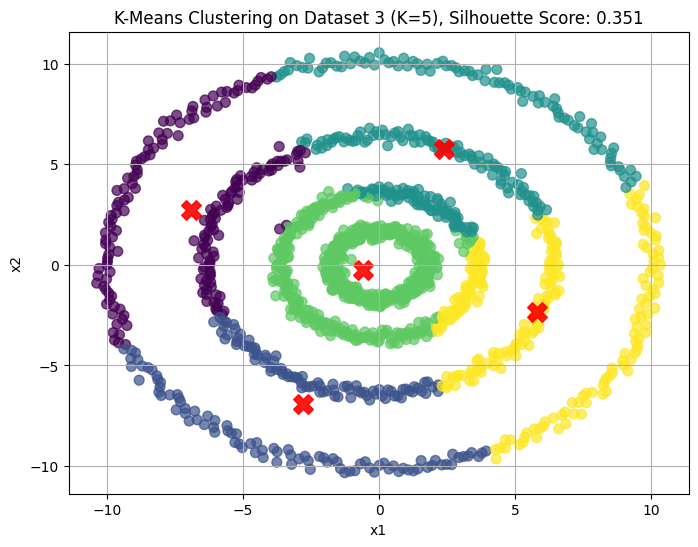

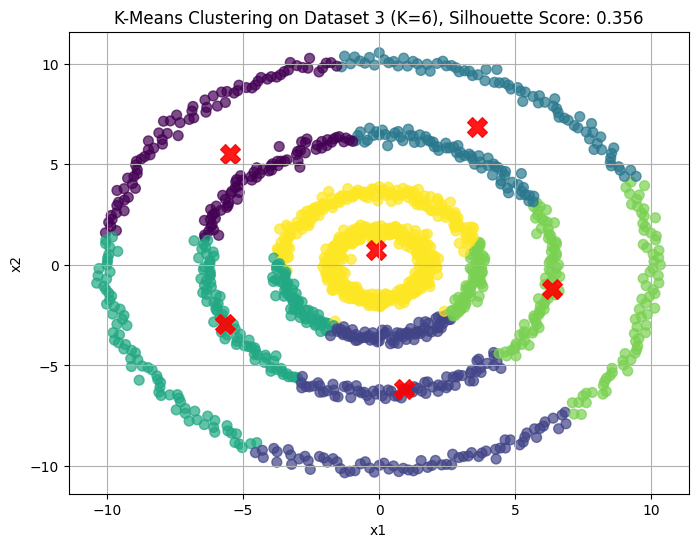

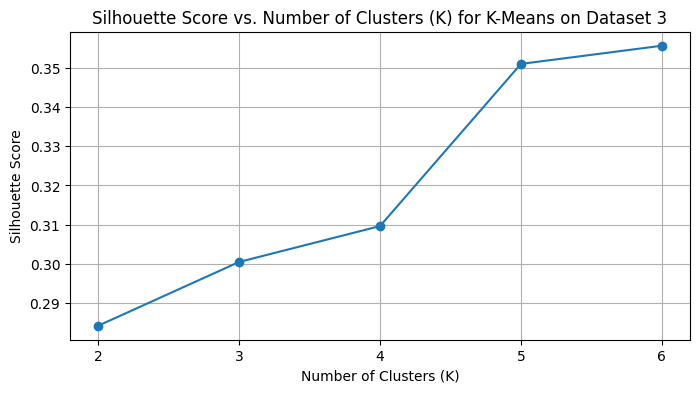

Silhouette Scores (K-Means on Dataset 3): [np.float64(0.2841487141496659), np.float64(0.3004471427182319), np.float64(0.30961984569816436), np.float64(0.35106670741531876), np.float64(0.3557165941227934)]


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data3 = pd.read_csv('lab03_dataset_3.csv')
X3 = data3[['x1', 'x2']].values

k_range = range(2, 7)
silhouette_scores_kmeans_d3 = []
inertia_values_d3 = []

for k_val in k_range:
    kmeans = KMeans(n_clusters=k_val, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X3)

    score = silhouette_score(X3, labels)
    silhouette_scores_kmeans_d3.append(score)
    inertia_values_d3.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.scatter(X3[:, 0], X3[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X')
    plt.title(f'K-Means Clustering on Dataset 3 (K={k_val}), Silhouette Score: {score:.3f}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores_kmeans_d3, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (K) for K-Means on Dataset 3')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Silhouette Scores (K-Means on Dataset 3):", silhouette_scores_kmeans_d3)

### 2.e (6 marks)

The dataset `lab03_dataset_3.csv` generates 4 concentric rings, so ideally we would want 4 clusters representing the 4 concentric rings. Did the clustering attempts in `3.c` and `3.d` lead to 4 concentric ring clusters? Explore some other sklearn clustering algorithms to see which one can actually produce 4 clusters corresponding with the 4 concentric rings and display it.

no


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


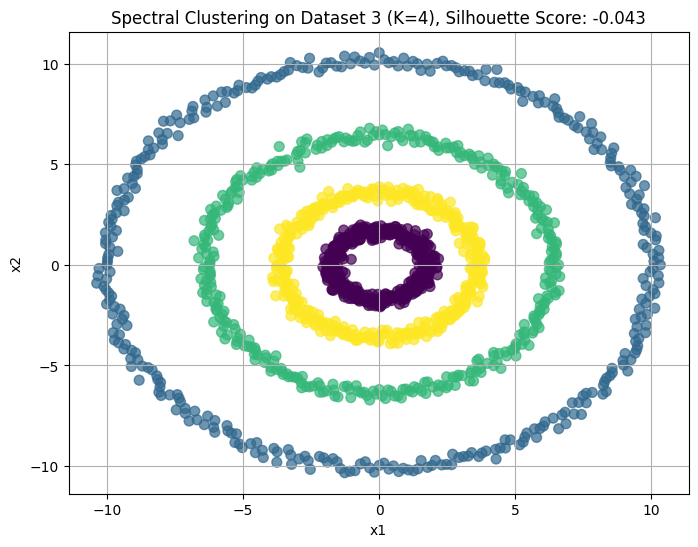

Silhouette Score for Spectral Clustering (K=4) on Dataset 3: -0.043


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

print("no")
data3 = pd.read_csv('lab03_dataset_3.csv')
X3 = data3[['x1', 'x2']].values

n_clusters = 4
spectral_rings = SpectralClustering(n_clusters=n_clusters,
                                  assign_labels='discretize',
                                  random_state=42,
                                  affinity='nearest_neighbors') # 'nearest_neighbors' often works well for manifolds
labels_spectral_rings = spectral_rings.fit_predict(X3)

score_spectral_rings = silhouette_score(X3, labels_spectral_rings)

plt.figure(figsize=(8, 6))
plt.scatter(X3[:, 0], X3[:, 1], c=labels_spectral_rings, cmap='viridis', s=50, alpha=0.7)
plt.title(f'Spectral Clustering on Dataset 3 (K={n_clusters}), Silhouette Score: {score_spectral_rings:.3f}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

print(f"Silhouette Score for Spectral Clustering (K=4) on Dataset 3: {score_spectral_rings:.3f}")


### Problem 3: MLP Classification (25 marks)

Using `lab03_dataset_4.csv`, train a MLP classifier with sklearn's `MLPClassifier`. The inputs are *alcohol, citric_acid, free_sulfur_dioxide, residual_sugar, sulphates* and the output is *quality_grp*, which has two categories, 0 and 1.

### 3.a (15 marks)

1. Normalize the input features.
2. Use a train-test split of 80-20.
3. For the learning task, you will train neural network models with different architectures:
   <br>Activation function = [logistic, relu, tanh]
   <br>Hidden layers = [1, 2, 3, 4, 5]
   <br>Neurons per layer = [2, 4, 6, 8]

So, in the first iteration you will create a learning model using the neural network architecture `[logistic, 1, 2]`, in the second iteration you will use `[logistic, 1, 4]`, all the way to `[tanh, 5, 8]`. For each of these learned models, compute the `misclassification rate` on the test set. Once you are done with all the training, you should generate a DataFrame with columns `Activation function, Hidden layers, Neurons per layer, Misclassification rate`, where each row will correspond with the individual training models. Since the total count of `activation functions, hidden layers, neurons` are `3, 5, 4` respectively, the `number of rows` in your output DataFrame should be `3 x 5 x 4 = 60`.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('lab03_dataset_4.csv')

features = ['alcohol', 'citric_acid', 'free_sulfur_dioxide', 'residual_sugar', 'sulphates']
target = 'quality_grp'

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

activations = ['logistic', 'relu', 'tanh']
hidden_layers_opts = [1, 2, 3, 4, 5]
neurons_per_layer_opts = [2, 4, 6, 8]

results = []

for activation in activations:
    for n_layers in hidden_layers_opts:
        for n_neurons in neurons_per_layer_opts:
            hidden_layer_sizes = tuple([n_neurons] * n_layers)

            mlp = MLPClassifier(
                activation=activation,
                hidden_layer_sizes=hidden_layer_sizes,
                random_state=42,
                max_iter=1000
            )

            mlp.fit(X_train, y_train)

            y_pred = mlp.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            misclassification_rate = 1 - accuracy

            results.append({
                'Activation function': activation,
                'Hidden layers': n_layers,
                'Neurons per layer': n_neurons,
                'Misclassification rate': misclassification_rate
            })

results_df = pd.DataFrame(results)

print(results_df)

   Activation function  Hidden layers  Neurons per layer  \
0             logistic              1                  2   
1             logistic              1                  4   
2             logistic              1                  6   
3             logistic              1                  8   
4             logistic              2                  2   
5             logistic              2                  4   
6             logistic              2                  6   
7             logistic              2                  8   
8             logistic              3                  2   
9             logistic              3                  4   
10            logistic              3                  6   
11            logistic              3                  8   
12            logistic              4                  2   
13            logistic              4                  4   
14            logistic              4                  6   
15            logistic              4   

### 3.b (5 marks)

The model with the `lowest misclassification rate` is the `best neural network`. Output the model parameters (activation function, hidden layers, neurons) of the `best neural network`. In the case of ties, choose the network with fewer neurons overall.

In [24]:
import pandas as pd


results_df['Total neurons'] = results_df['Hidden layers'] * results_df['Neurons per layer']

results_df_sorted = results_df.sort_values(by=['Misclassification rate', 'Total neurons'], ascending=[True, True])

best_model = results_df_sorted.iloc[0]

print(f"Activation function: {best_model['Activation function']}")
print(f"Hidden layers: {best_model['Hidden layers']}")
print(f"Neurons per layer: {best_model['Neurons per layer']}")
print(f"Misclassification rate: {best_model['Misclassification rate']:.4f}")

Activation function: tanh
Hidden layers: 5
Neurons per layer: 4
Misclassification rate: 0.1715


### 3.c (5 marks)

Create a scatterplot of the `misclassification rates vs activation functions`. The scatterplot should have 3 colors differentiating the misclassification rates associated with the 3 activation functions.

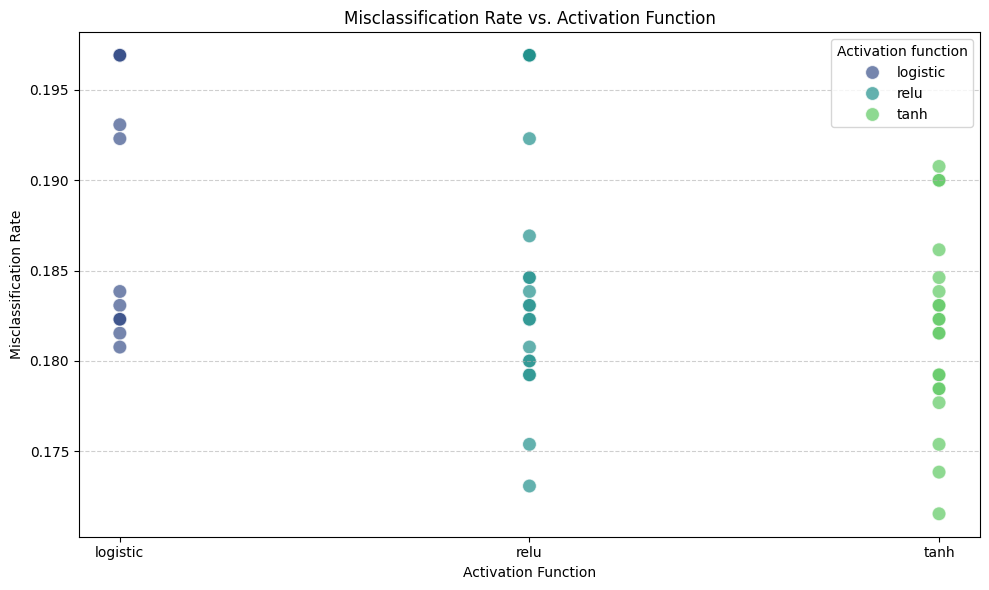

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=results_df,
    x='Activation function',
    y='Misclassification rate',
    hue='Activation function',
    palette='viridis',
    s=100,
    alpha=0.7
)

plt.title('Misclassification Rate vs. Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Misclassification Rate')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Problem 4: MLP Regression (25 marks)

Using `lab03_dataset_5.csv`, train a MLP classifier with sklearn's `MLPRegressor`. The inputs are *housing_median_age, total_rooms, households, median_income* and the output is *median_house_value*.

### 4.a (15 marks)

1. Normalize the entire dataset.
2. Use a train-test split of 80-20.
3. For the learning task, you will train neural network models with different architectures:
   <br>Activation function = [logistic, relu, tanh]
   <br>Hidden layers = [1, 2, 3, 4, 5]
   <br>Neurons per layer = [2, 4, 6, 8]

So, in the first iteration you will create a learning model using the neural network architecture `[logistic, 1, 2]`, in the second iteration you will use `[logistic, 1, 4]`, all the way to `[tanh, 5, 8]`. For each of these learned models, compute the `root mean squared error` on the test set. Once you are done with all the training, you should generate a DataFrame with columns `Activation function, Hidden layers, Neurons per layer, Root mean squared error`, where each row will correspond with the individual training models. Since the total count of `activation functions, hidden layers, neurons` are `3, 5, 4` respectively, the `number of rows` in your output DataFrame should be `3 x 5 x 4 = 60`.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

df_reg = pd.read_csv('lab03_dataset_5.csv')

features_reg = ['housing_median_age', 'total_rooms', 'households', 'median_income']
target_reg = 'median_house_value'

X_reg = df_reg[features_reg]
y_reg = df_reg[target_reg]

scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

activations_reg = ['logistic', 'relu', 'tanh']
hidden_layers_opts_reg = [1, 2, 3, 4, 5]
neurons_per_layer_opts_reg = [2, 4, 6, 8]

results_reg = []

for activation in activations_reg:
    for n_layers in hidden_layers_opts_reg:
        for n_neurons in neurons_per_layer_opts_reg:
            hidden_layer_sizes = tuple([n_neurons] * n_layers)

            mlp_reg = MLPRegressor(
                activation=activation,
                hidden_layer_sizes=hidden_layer_sizes,
                random_state=42,
                max_iter=1000
            )

            mlp_reg.fit(X_reg_train, y_reg_train)

            y_reg_pred = mlp_reg.predict(X_reg_test)
            mse = mean_squared_error(y_reg_test, y_reg_pred)
            rmse = np.sqrt(mse)

            results_reg.append({
                'Activation function': activation,
                'Hidden layers': n_layers,
                'Neurons per layer': n_neurons,
                'Root mean squared error': rmse
            })

results_reg_df = pd.DataFrame(results_reg)

print(results_reg_df)

   Activation function  Hidden layers  Neurons per layer  \
0             logistic              1                  2   
1             logistic              1                  4   
2             logistic              1                  6   
3             logistic              1                  8   
4             logistic              2                  2   
5             logistic              2                  4   
6             logistic              2                  6   
7             logistic              2                  8   
8             logistic              3                  2   
9             logistic              3                  4   
10            logistic              3                  6   
11            logistic              3                  8   
12            logistic              4                  2   
13            logistic              4                  4   
14            logistic              4                  6   
15            logistic              4   

### 4.b (5 marks)

The model with the `lowest RMSE` is the `best neural network`. Output the model parameters (activation function, hidden layers, neurons) of the `best neural network`. In the case of ties, choose the network with fewer neurons overall.

In [28]:
import pandas as pd


results_reg_df['Total neurons'] = results_reg_df['Hidden layers'] * results_reg_df['Neurons per layer']

results_reg_df_sorted = results_reg_df.sort_values(by=['Root mean squared error', 'Total neurons'], ascending=[True, True])

best_reg_model = results_reg_df_sorted.iloc[0]

print("Best:")
print(f"Activation function: {best_reg_model['Activation function']}")
print(f"Hidden layers: {best_reg_model['Hidden layers']}")
print(f"Neurons per layer: {best_reg_model['Neurons per layer']}")
print(f"Root Mean Squared Error: {best_reg_model['Root mean squared error']:.4f}")


Best:
Activation function: relu
Hidden layers: 4
Neurons per layer: 8
Root Mean Squared Error: 73774.7142


### 4.c (5 marks)

Create a scatterplot of the `root mean squared error vs activation functions`. The scatterplot should have 3 colors differentiating the misclassification rates associated with the 3 activation functions.

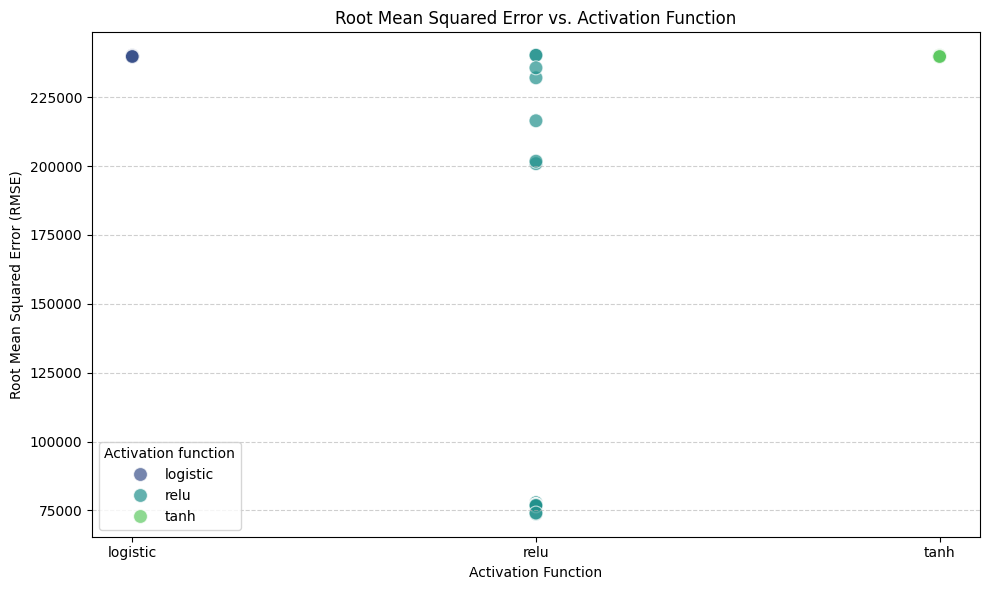

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=results_reg_df,
    x='Activation function',
    y='Root mean squared error',
    hue='Activation function', 
    palette='viridis',         
    s=100,                     
    alpha=0.7                  
)

plt.title('Root Mean Squared Error vs. Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(axis='y', linestyle='--', alpha=0.6) 
plt.tight_layout() 
plt.show()